In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('loan.csv', low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(39717, 111)

### Since we are interested in knowing only that if particular member would default or not, keeping the data which are in current paying status will not help us. So we will be keeping only 'Charged-Off' and 'Fully Paid'.

In [4]:
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [5]:
loan_data.shape

(38577, 111)

### Checking the percentage of null value in each column. And dropping the column whose percentage of null values exceed more than 60%.

In [6]:
perc_null_value = (loan_data.isna().sum()/len(loan_data))*100
perc_null_value[perc_null_value > 10]

desc                               32.472717
mths_since_last_delinq             64.559193
mths_since_last_record             92.897322
next_pymnt_d                      100.000000
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

In [7]:
loan_data.drop(perc_null_value[perc_null_value > 60].index, inplace = True, axis = 1)

In [8]:
loan_data.shape

(38577, 54)

### Checking if we have any duplicated values in id, member_id or url, if none then we will drop member_id and url since they are unique and id would be enough to represent them.

In [9]:
loan_data['id'].duplicated().sum()

0

In [10]:
loan_data['member_id'].duplicated().sum()

0

In [11]:
loan_data['url'].duplicated().sum()

0

In [12]:
loan_data.drop(['member_id','url'], inplace = True, axis = 1)

### Dropping the customer behaviour columns which are not related to finding if the loan would be defaulted or not. Since they would be more helpful in finding if the loan application is accepted or not.

In [13]:
loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal', 'revol_util',
               'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
               'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
               'application_type'], inplace = True, axis = 1)

In [14]:
loan_data.shape

(38577, 31)

### Checking the remaining column null values. And dropping columns that are hard to fill.

In [15]:
loan_data.isna().sum().sort_values(ascending=False)

desc                          12527
emp_title                      2386
emp_length                     1033
pub_rec_bankruptcies            697
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
tax_liens                        39
title                            11
delinq_amnt                       0
acc_now_delinq                    0
policy_code                       0
initial_list_status               0
dti                               0
addr_state                        0
zip_code                          0
purpose                           0
id                                0
pymnt_plan                        0
loan_amnt                         0
issue_d                           0
verification_status               0
annual_inc                        0
home_ownership                    0
sub_grade                         0
grade                             0
installment                       0
int_rate                          0
term                        

In [16]:
loan_data.drop(['desc','emp_title','title'], inplace = True, axis = 1)

### Checking the values if they can be imputed.

In [17]:
loan_data['tax_liens'].value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [18]:
loan_data['chargeoff_within_12_mths'].value_counts()

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

In [19]:
loan_data['acc_now_delinq'].value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

In [20]:
loan_data['collections_12_mths_ex_med'].value_counts()

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

In [21]:
loan_data['initial_list_status'].value_counts()

f    38577
Name: initial_list_status, dtype: int64

In [22]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
loan_data['delinq_amnt'].value_counts()

0    38577
Name: delinq_amnt, dtype: int64

In [24]:
loan_data['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

### Dropping the columns which has single values.

In [25]:
loan_data.drop(['tax_liens','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med','initial_list_status',
                'delinq_amnt','policy_code'],
              inplace = True, axis = 1)

In [26]:
loan_data.shape

(38577, 21)

In [27]:
loan_data.isna().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
zip_code                   0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
home_ownership             0
dtype: int64

### Imputing the missing values with 0 as we are unaware of the actual data.

In [28]:
loan_data['emp_length'].fillna('0 year',inplace = True)

In [29]:
loan_data['pub_rec_bankruptcies'].fillna(0.0,inplace = True)

### Cleaning of emp_length, revol_util and int_rate, and conversion of data of other columns to their respective data types.

In [30]:
def cleaning_emp_length(x):
    if x == '< 1 year':
        return x.replace('< 1 year','0')
    else:
        return x.replace(' years','').replace(' year','').replace('+','')

In [31]:
loan_data['emp_length'] = loan_data['emp_length'].apply(cleaning_emp_length)
loan_data['emp_length'] = loan_data['emp_length'].astype('int64')

In [32]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : x.replace('%',''))
loan_data['int_rate'] = loan_data['int_rate'].astype('float64')

In [33]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'],format = '%b-%y')

In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   funded_amnt           38577 non-null  int64         
 3   funded_amnt_inv       38577 non-null  float64       
 4   term                  38577 non-null  object        
 5   int_rate              38577 non-null  float64       
 6   installment           38577 non-null  float64       
 7   grade                 38577 non-null  object        
 8   sub_grade             38577 non-null  object        
 9   emp_length            38577 non-null  int64         
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

### Deriving new columns as per need

In [35]:
loan_data['issue_d_month'] = pd.DatetimeIndex(loan_data['issue_d']).month

In [36]:
loan_data['issue_d_year'] = pd.DatetimeIndex(loan_data['issue_d']).year

In [37]:
loan_data['loan_amount_apprvd_ratio'] = round(loan_data['funded_amnt_inv']/loan_data['funded_amnt'],2)

In [38]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_amount_apprvd_ratio
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,12,2011,1.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,...,Charged Off,n,car,309xx,GA,1.00,0.0,12,2011,1.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Fully Paid,n,small_business,606xx,IL,8.72,0.0,12,2011,1.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Fully Paid,n,other,917xx,CA,20.00,0.0,12,2011,1.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,Fully Paid,n,wedding,852xx,AZ,11.20,0.0,12,2011,1.0


# Univariate Analysis

In [39]:
perc_loan_status = loan_data['loan_status'].value_counts()
perc_loan_status = round((perc_loan_status/len(loan_data))*100,2)
perc_loan_status

Fully Paid     85.41
Charged Off    14.59
Name: loan_status, dtype: float64

[]

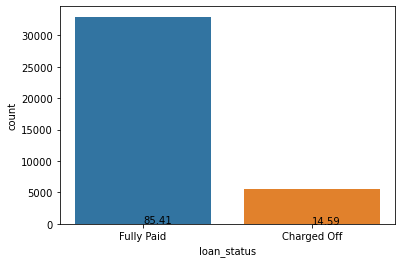

In [40]:
sns.countplot(loan_data['loan_status'])
for i, v in enumerate(perc_loan_status):
    plt.text(i, v, str(v))
plt.plot()

__85.41%__ of the Applicants paid off the full loan where as __14.59%__ of applicants are defaulters.

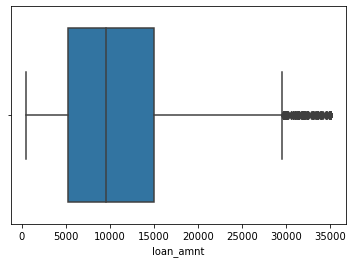

In [41]:
sns.boxplot(loan_data['loan_amnt'])
plt.show()

In the boxplot we can see that the most number of data lies between 5,000 and 15,000, and the maximum loan taken is 35,000 but after 30,000 mark, the loan borrowed above that mark is very low.

In [42]:
ratio_count = loan_data['loan_amount_apprvd_ratio'].value_counts()
ratio_perc = round((ratio_count/len(loan_data))*100,2)
ratio_perc

1.00    65.14
0.99    10.62
0.98     5.95
0.97     2.59
0.96     1.86
        ...  
0.01     0.05
0.53     0.05
0.15     0.04
0.33     0.04
0.44     0.04
Name: loan_amount_apprvd_ratio, Length: 101, dtype: float64

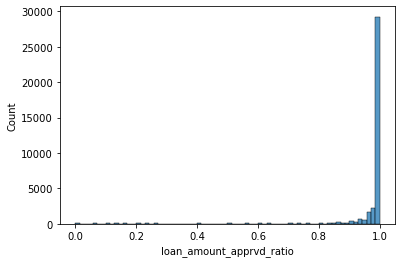

In [43]:
sns.histplot(loan_data['loan_amount_apprvd_ratio'],bins = 70)
plt.show()

From the above plot we can conclude that Lending Club has approved and sanctioned 65.14% of the applied loan amount.

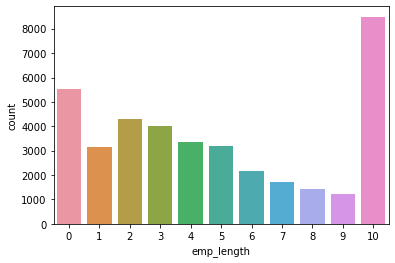

In [44]:
sns.countplot(loan_data['emp_length'])
plt.show()

Around 8000+ applicants have work experience of 10 years or more.

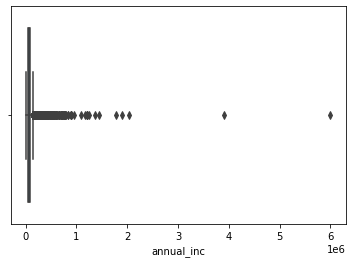

In [45]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

We can see that certain data value is the outlier here i.e their income is more than 300,000$, we can assume that these data lies above the quantile of 99%. We can drop the outlier data for the temproary analysis, but the data point would remain in the original data.

In [46]:
loan_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [47]:
loan_data_temp = loan_data[loan_data['annual_inc'] < np.percentile(loan_data['annual_inc'], 99, interpolation = 'midpoint')]

In [48]:
loan_data[loan_data['annual_inc'] < np.percentile(loan_data['annual_inc'], 99, interpolation = 'midpoint')].describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_amount_apprvd_ratio
count,3.819100e+04,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000,38191.000000
mean,6.764370e+05,10962.265979,10703.329973,10146.556380,11.917876,319.938941,4.798932,65313.610090,13.333491,0.043021,7.114634,2010.309261,0.950248
std,2.092601e+05,7266.157660,7011.076206,6943.535384,3.684108,205.948407,3.596014,35150.773045,6.657843,0.203550,3.408368,0.882733,0.161678
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,1.000000,2007.000000,0.000000
25%,5.122990e+05,5200.000000,5100.000000,5000.000000,8.940000,165.380000,2.000000,40000.000000,8.210000,0.000000,4.000000,2010.000000,0.990000
50%,6.566420e+05,9600.000000,9500.000000,8575.000000,11.710000,276.300000,4.000000,58000.000000,13.430000,0.000000,7.000000,2011.000000,1.000000
75%,8.290710e+05,15000.000000,15000.000000,14000.000000,14.350000,421.800000,9.000000,80232.000000,18.600000,0.000000,10.000000,2011.000000,1.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,234000.000000,29.990000,2.000000,12.000000,2011.000000,1.000000


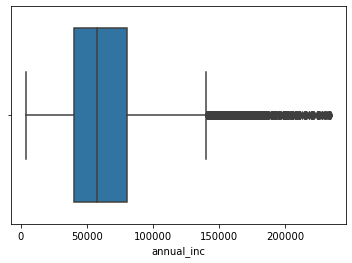

In [49]:
sns.boxplot(loan_data_temp['annual_inc'])
plt.show()

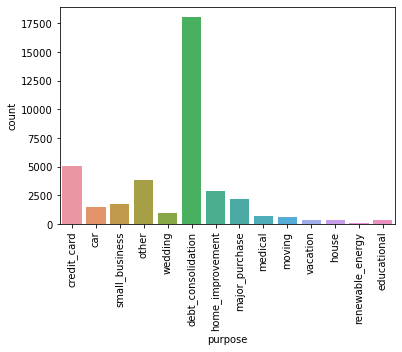

In [50]:
sns.countplot(loan_data['purpose'])
plt.xticks(rotation = 90)
plt.show()

We can see that most people have applied loan for __Debt Consolidation__ and very few have applied __Renewable Energy__

In [51]:
perc_loan_issue_year = loan_data['issue_d_year'].value_counts()
perc_loan_issue_year = round((perc_loan_issue_year/len(loan_data))*100,2)
perc_loan_issue_year

2011    53.18
2010    29.89
2009    12.22
2008     4.05
2007     0.65
Name: issue_d_year, dtype: float64

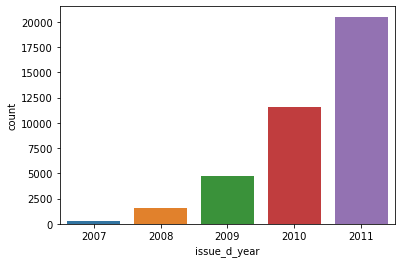

In [52]:
sns.countplot(loan_data['issue_d_year'])
plt.show()

We can inference from the above plot that around 53% of loan was issue in the year of 2011.

# Segmented Univariate Analysis

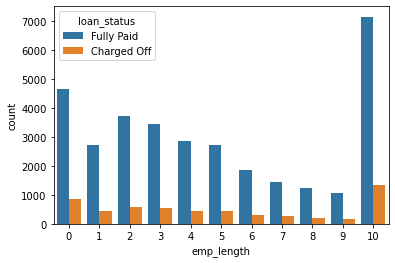

In [53]:
sns.countplot(loan_data['emp_length'], hue = loan_data['loan_status'])
plt.show()

From the above visualization we can confirm that most Employees who have work length of 10 years or more have returned the loans. But most of the applicants of work length of 10 years have also defaulted their loans.

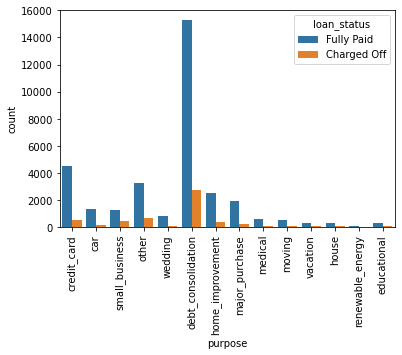

In [54]:
sns.countplot(loan_data['purpose'], hue = loan_data['loan_status'])
plt.xticks(rotation = 90)
plt.show()

We can infer that applicants who took loan for debt_consolidation are the ones who have almost paid all of their loans on the other hand, the highest number of defaulters are also from the same category.

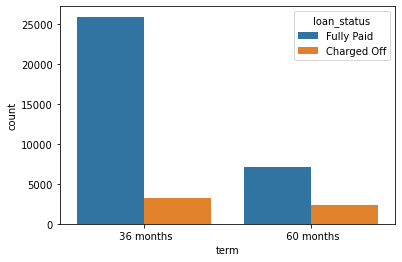

In [55]:
sns.countplot(loan_data['term'], hue = loan_data['loan_status'])
plt.show()

From the above plot we can draw an inference that the applicants who have taken loan with the term on 36 months are most likely to default their loans than the ones who have taken loan with term of 60 months.

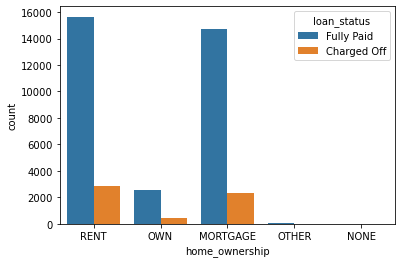

In [56]:
sns.countplot(loan_data['home_ownership'], hue = loan_data['loan_status'])
plt.show()

People who live in rent and mortgage are more likely to default their loans then the other category in home ownership, but the Applicants living in rent are more likely to be defaulters than the Applicants of mortgage.

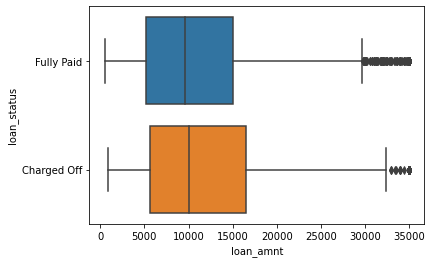

In [57]:
sns.boxplot(x = loan_data['loan_amnt'], y = loan_data['loan_status'])
plt.show()

The 25 percentile and median are closely related to each other. But as we can see the loan amounts which are getting defaulted are more than 15,000$. So basically that means thatt more the loan_amnt higher the chances that the loan will get defaulted.

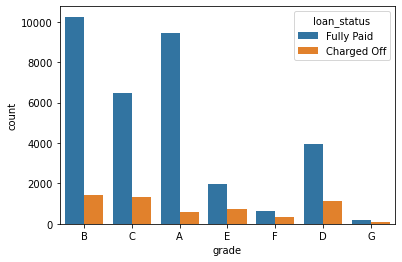

In [58]:
sns.countplot(loan_data['grade'],hue = loan_data['loan_status'])
plt.show()

As we can see that the higher grades have more applicants who have paid loans but lower grades like E,F,G have comparatively less, so we can say that lower grades will default their loans more than higher grades.

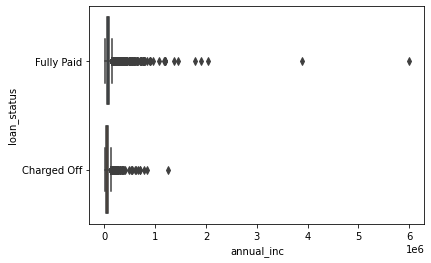

In [59]:
sns.boxplot( x= loan_data['annual_inc'], y = loan_data['loan_status'])
plt.show()

Since the above data contains outlier we will be using the data which falls under the 99% for the analysis.

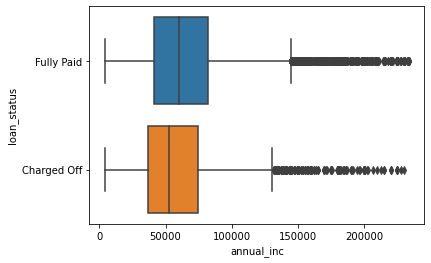

In [60]:
sns.boxplot( x= loan_data['annual_inc'][loan_data['annual_inc'] < np.percentile(loan_data['annual_inc'], 99, interpolation = 'midpoint')], y = loan_data['loan_status'])
plt.show()

In [61]:
loan_data['annual_inc'][loan_data['annual_inc'] < np.percentile(loan_data['annual_inc'], 99, interpolation = 'midpoint')].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

The 25th, median, 75th and the maximum varies a lot in the above plot. It clearly shows that the ones whose income is less have more chances of defaulting their loans than the ones who have more income.

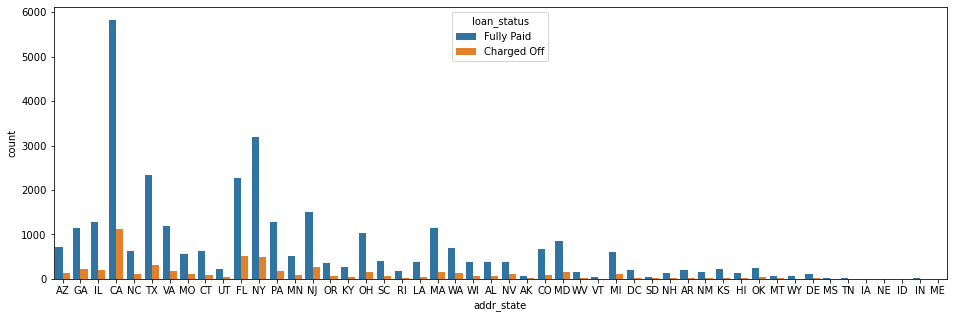

In [62]:
plt.figure(figsize=[16,5])
sns.countplot(loan_data['addr_state'], hue = loan_data['loan_status'])
plt.show()

Applicants of CA, NY, FL and TX are more likely to default the loans.

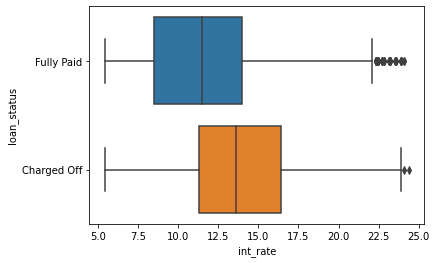

In [63]:
sns.boxplot(x = loan_data['int_rate'], y = loan_data['loan_status'])
plt.show()

There is a high variation in data between the charged off interest rate and fully paid interest rate, which clearly indicates that more the interest rate more it is likely the applicants will be defaulters.

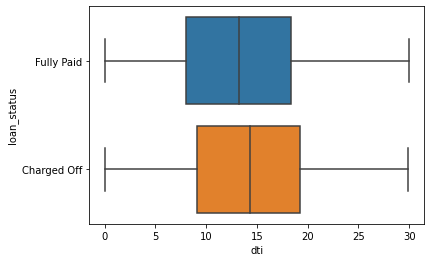

In [64]:
sns.boxplot(x = loan_data['dti'], y = loan_data['loan_status'])
plt.show()

From the above plot we can infer that the charged off applicants DTI variation is comparitively more than that of the fully paid. 

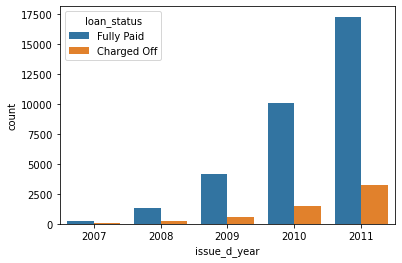

In [65]:
sns.countplot(loan_data['issue_d_year'], hue = loan_data['loan_status'])
plt.show()

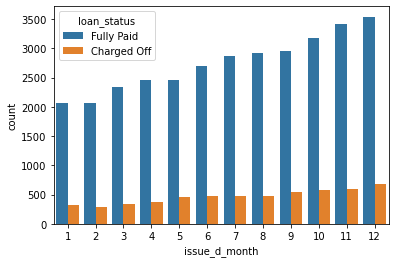

In [66]:
sns.countplot(loan_data['issue_d_month'], hue = loan_data['loan_status'])
plt.show()

The loan issued in 2011 and from the month of October - December are most likely to get defaulted.

# Bivariate Analysis

In [67]:
corr_data = loan_data[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','emp_length',
                      'annual_inc','dti']]
corr = corr_data.corr()

In [68]:
corr.style.background_gradient(cmap = 'coolwarm')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.301265,0.156493,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.304930,0.156229,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.297473,0.165112,0.251981,0.070663
int_rate,0.301265,0.304930,0.297473,1.000000,0.011633,0.048899,0.110913
emp_length,0.156493,0.156229,0.165112,0.011633,1.000000,0.120469,0.050561
annual_inc,0.268999,0.264798,0.251981,0.048899,0.120469,1.000000,-0.121530
dti,0.062436,0.062194,0.070663,0.110913,0.050561,-0.121530,1.000000


From the above correlation table we can conclude that loan_amnt, funded_amnt and funded_amnt_inv are highly correlated to each other since most of them have got the loans they asked for. And where as others columns are not correlated to each other in any way.

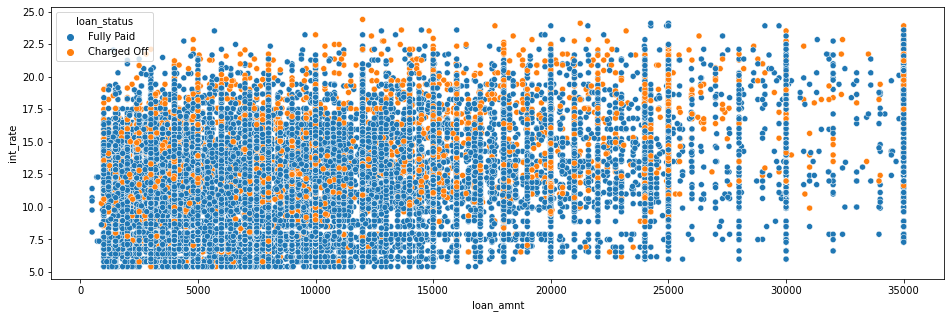

In [69]:
plt.figure(figsize=[16,5])
sns.scatterplot(x = loan_data['loan_amnt'], y = loan_data['int_rate'], hue = loan_data['loan_status'])
plt.show()

As we can see that higher the loan_amnt, more the interest and hence most of loans are getting defaulted when there is high interest rate.

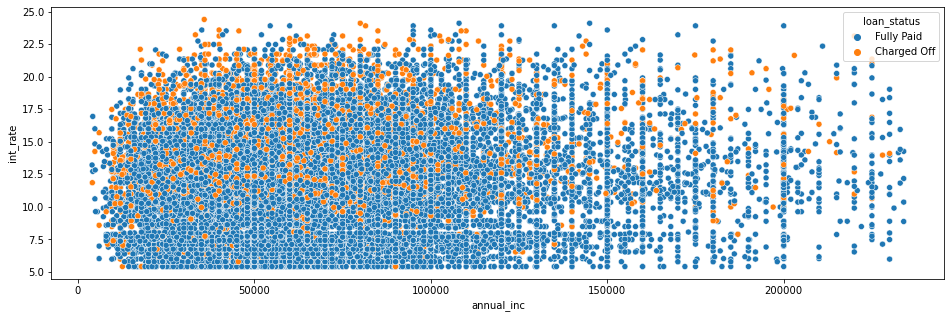

In [70]:
plt.figure(figsize=[16,5])
sns.scatterplot(x = loan_data['annual_inc'][loan_data['annual_inc'] < np.percentile(loan_data['annual_inc'], 99, interpolation = 'midpoint')], y = loan_data['int_rate'], hue = loan_data['loan_status'])
plt.show()

From the above figure we can inference that the loan has high chances to get defaulted if the applicant has their annual income less than 1500,00$.

In [71]:
loan_income_int_pivot = pd.crosstab(index = loan_data['emp_length'], columns = loan_data['loan_status'], values = loan_data['int_rate'], aggfunc = 'mean')
loan_income_int_pivot

loan_status,Charged Off,Fully Paid
emp_length,,
0,13.192780,11.376930
1,13.650088,11.721194
2,13.831781,11.719270
3,13.945748,11.637556
4,13.972965,11.783111
5,13.852336,11.650351
6,13.971889,11.629027
7,14.114715,11.719130
8,13.753793,11.492881


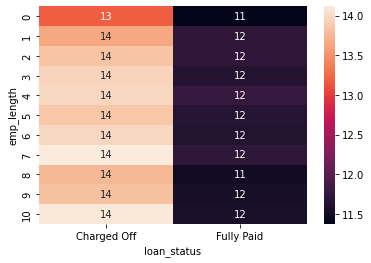

In [72]:
sns.heatmap(loan_income_int_pivot, annot = True)
plt.show()

From the above plot we can conclude that more the emp_length, more the interest rate, hence more the chances of the loan to get defaulted.

In [73]:
loan_term_amnt_pivot = pd.crosstab(index = loan_data['term'], columns = loan_data['loan_status'], values = loan_data['loan_amnt'], aggfunc = 'mean')
loan_term_amnt_pivot

loan_status,Charged Off,Fully Paid
term,,
36 months,9388.720174,9618.411033
60 months,15755.822917,15425.935602


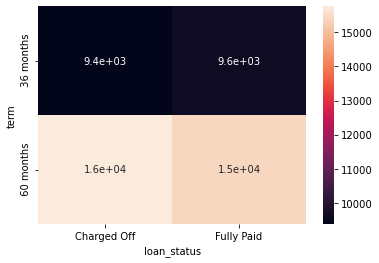

In [74]:
sns.heatmap(loan_term_amnt_pivot, annot = True)
plt.show()

The amounts paid are highest in 36 months term and less in 60 months term. Hence we can conclude that more the terms, more likely that the loan is going to get defaulted.

# FINAL CONCLUSIONS

- Loan amount of 15,000 and more have high chances of getting defaulted.
- More the grade goes lower, less chances that the applicants will repay the loan.
- People will annual income less than 75,000 have more chances of defaulting the loan.
- The loans of term 60 months have more chances of getting defaulted.
- The states CA, DL, NY and TX have more defaulters, so the applicants of these states will default their loans more.
- Lending club should consider to check the DTI as more the DTI higher the chances that the loan will default.
- If the loan amount is high then the interest rate is also high that would make the applicants default their loans.
- The loan issued in 2011 and in the month of December are most likely to get defaulted.
- More the employee service length, more the interest rate, hence more the chances of the loan to get defaulted.